### Первая лабораторная (parser)
### https://github.com/itmo-ml-lab-ML-course/parser-peterochek

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./imdb_clean.csv')

In [3]:
box = pd.read_csv('./boxoffice.csv')

In [4]:
df = pd.merge(df, box, on='url', how='inner')

In [5]:
df.head()

,url,title,rating,runtime,certificate,genre,metascore,description,votes,gross,...,domestic_percent,international,international_percent,worldwide,domestic_opening,budget,distributor,year,month,day
0,111161,The Shawshank Redemption,9.3,142.0,R,Drama,82.0,Over the course of several years two convicts ...,2810168,28.34,...,0.996,0.117527,0.004,28.884716,0.727327,25.0,Columbia Pictures,1994.0,9.0,23.0
1,468569,The Dark Knight,9.0,152.0,PG-13,Action Crime Drama,84.0,When the menace known as the Joker wreaks havo...,2791803,534.86,...,0.531,472.270460,0.469,1007.257536,158.411483,185.0,Warner Bros.,2008.0,7.0,16.0
2,1375666,Inception,8.8,148.0,PG-13,Action Adventure Sci-Fi,74.0,A thief who steals corporate secrets through t...,2477844,292.58,...,0.349,546.443300,0.651,839.030630,62.785337,160.0,Warner Bros.,2010.0,7.0,15.0
3,137523,Fight Club,8.8,139.0,R,Drama,67.0,An insomniac office worker and a devil-may-car...,2244642,37.03,...,0.366,64.179600,0.634,101.209702,11.035485,63.0,Twentieth Century Fox,1999.0,10.0,15.0
4,109830,Forrest Gump,8.8,142.0,PG-13,Drama Romance,82.0,The history of the United States from the 1950...,2187663,330.25,...,0.487,347.771195,0.513,678.226465,24.450602,55.0,Paramount Pictures,1994.0,7.0,6.0


### У сериалов нет metascore, gross и director

In [6]:
df = df[~df.isnull().any(axis=1)]

In [7]:
df = df.drop(columns=['url'])

In [8]:
df.isna().sum().sum()

0

### One hot'аем genre и certificate

In [9]:
genre_dummies = df['genre'].str.get_dummies(' ')
df = pd.concat([df, genre_dummies], axis=1)
df.drop('genre', axis=1, inplace=True)

In [10]:
genre_dummies = df['certificate'].str.get_dummies()
df = pd.concat([df, genre_dummies], axis=1)
df.drop('certificate', axis=1, inplace=True)

In [11]:
# genre_dummies = df['distributor'].str.get_dummies()
# df = pd.concat([df, genre_dummies], axis=1)
df.drop('distributor', axis=1, inplace=True)

In [12]:
df.head()

,title,rating,runtime,metascore,description,votes,gross,director,stars,start_year,...,Thriller,War,Western,G,NC-17,Not Rated,PG,PG-13,R,X
0,The Shawshank Redemption,9.3,142.0,82.0,Over the course of several years two convicts ...,2810168,28.34,Frank Darabont,Tim Robbins Morgan Freeman Bob Gunton William ...,1994,...,0,0,0,0,0,0,0,0,1,0
1,The Dark Knight,9.0,152.0,84.0,When the menace known as the Joker wreaks havo...,2791803,534.86,Christopher Nolan,Christian Bale Heath Ledger Aaron Eckhart Mich...,2008,...,0,0,0,0,0,0,0,1,0,0
2,Inception,8.8,148.0,74.0,A thief who steals corporate secrets through t...,2477844,292.58,Christopher Nolan,Leonardo DiCaprio Joseph Gordon-Levitt Elliot ...,2010,...,0,0,0,0,0,0,0,1,0,0
3,Fight Club,8.8,139.0,67.0,An insomniac office worker and a devil-may-car...,2244642,37.03,David Fincher,Brad Pitt Edward Norton Meat Loaf Zach Grenier,1999,...,0,0,0,0,0,0,0,0,1,0
4,Forrest Gump,8.8,142.0,82.0,The history of the United States from the 1950...,2187663,330.25,Robert Zemeckis,Tom Hanks Robin Wright Gary Sinise Sally Field,1994,...,0,0,0,0,0,0,0,1,0,0


### Можно применить TF-IDF к description, однако я решил этого не делать, чтобы не бежать впереди паровоза

In [13]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = nltk.corpus.stopwords.words('english')
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=20)
description_features = tfidf_vectorizer.fit_transform(df['description'])
description_df = pd.DataFrame(description_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [14]:
description_df.shape, df.shape

((2360, 20), (2360, 49))

In [15]:
description_df.index, df.index

(RangeIndex(start=0, stop=2360, step=1),
 Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
        ...
        7035, 7044, 7063, 7068, 7073, 7081, 7089, 7097, 7130, 7133],
       dtype='int64', length=2360))

In [16]:
description_df = description_df.reset_index(drop=True)
df = df.reset_index(drop=True)

In [17]:
description_df.head()

,back,city,family,father,find,finds,friends,group,help,life,love,man,must,new,one,school,two,woman,world,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672258,0.0,0.740317,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [18]:
df = pd.concat([df, description_df], axis=1) # TODO check if needed
df = df.drop(columns=['description'])

### Убираем строковые колонки

In [19]:
df.select_dtypes(include=['object'])

,title,director,stars
0,The Shawshank Redemption,Frank Darabont,Tim Robbins Morgan Freeman Bob Gunton William ...
1,The Dark Knight,Christopher Nolan,Christian Bale Heath Ledger Aaron Eckhart Mich...
2,Inception,Christopher Nolan,Leonardo DiCaprio Joseph Gordon-Levitt Elliot ...
3,Fight Club,David Fincher,Brad Pitt Edward Norton Meat Loaf Zach Grenier
4,Forrest Gump,Robert Zemeckis,Tom Hanks Robin Wright Gary Sinise Sally Field
...,...,...,...
2355,Gossip,Davis Guggenheim,James Marsden Lena Headey Norman Reedus Kate H...
2356,Kissing Jessica Stein,Charles Herman-Wurmfeld,Jennifer Westfeldt Heather Juergensen Tovah Fe...
2357,Hamlet 2,Andrew Fleming,Steve Coogan Elisabeth Shue Catherine Keener J...
2358,Marmaduke,Tom Dey,Owen Wilson Judy Greer Lee Pace Emma Stone


In [20]:
df = df.drop(columns=['title', 'director', 'stars'])

### Посмотрим на корреляцию признаков у уберём сильно связанные

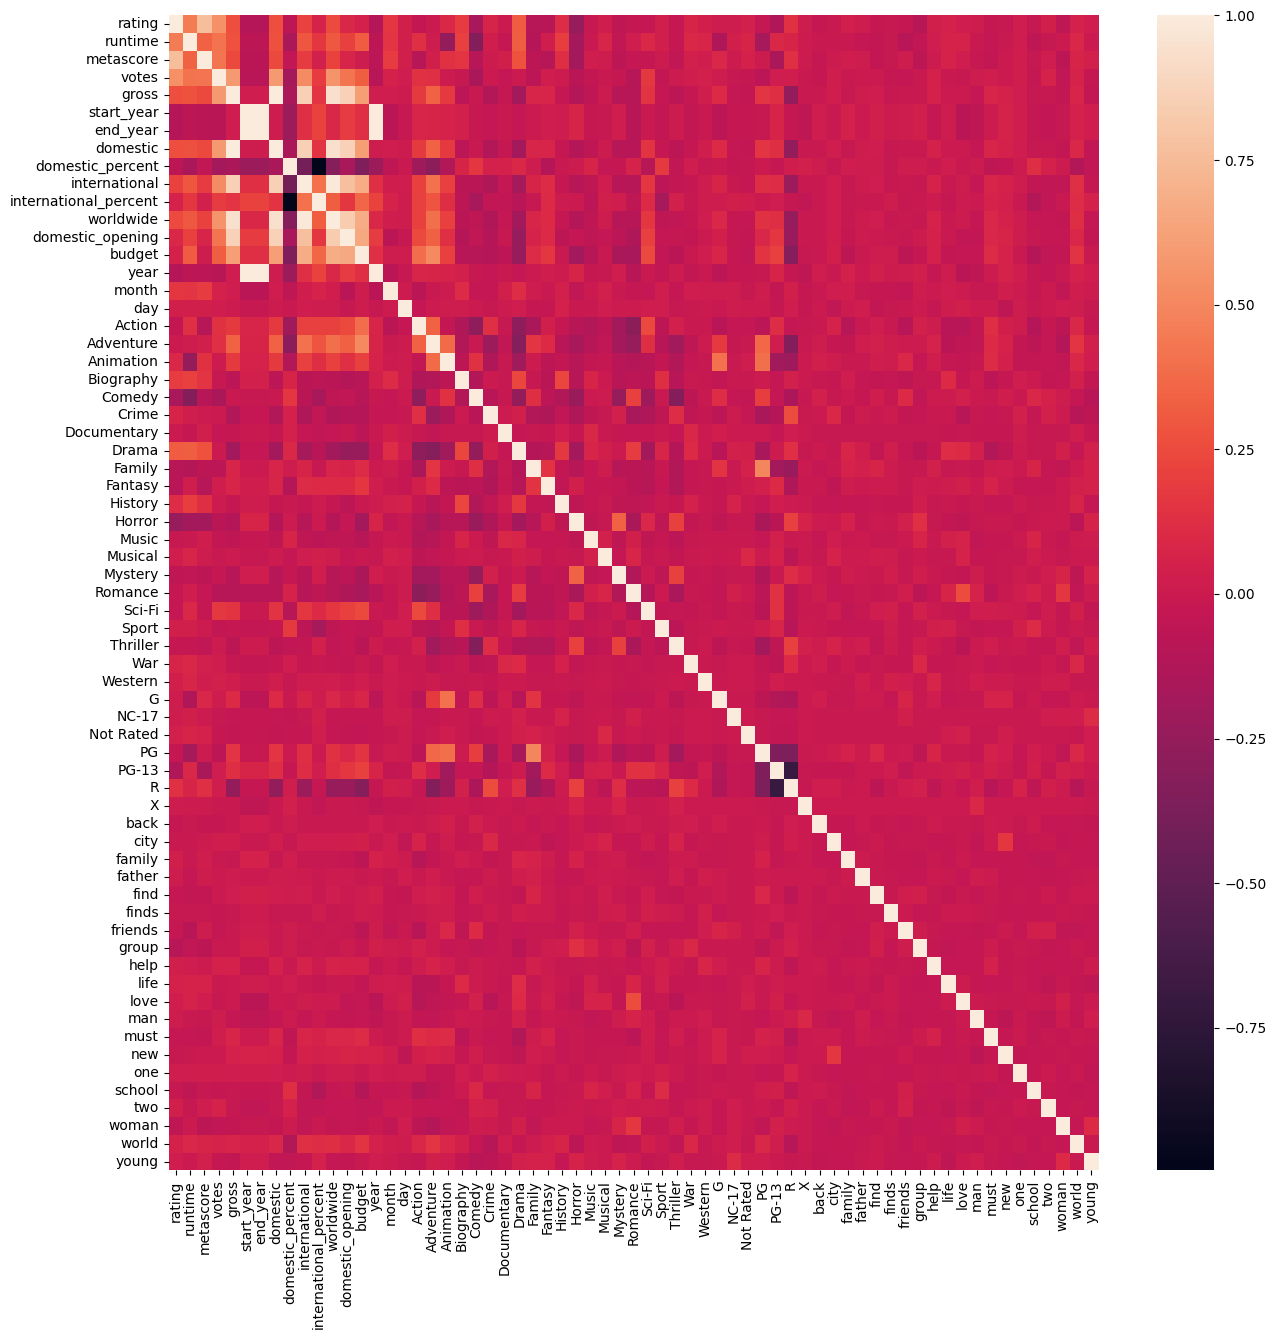

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


# plt.savefig('corr.png', dpi=300)
plt.show()

In [22]:
import numpy as np


corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df.drop(to_drop, axis=1, inplace=True)

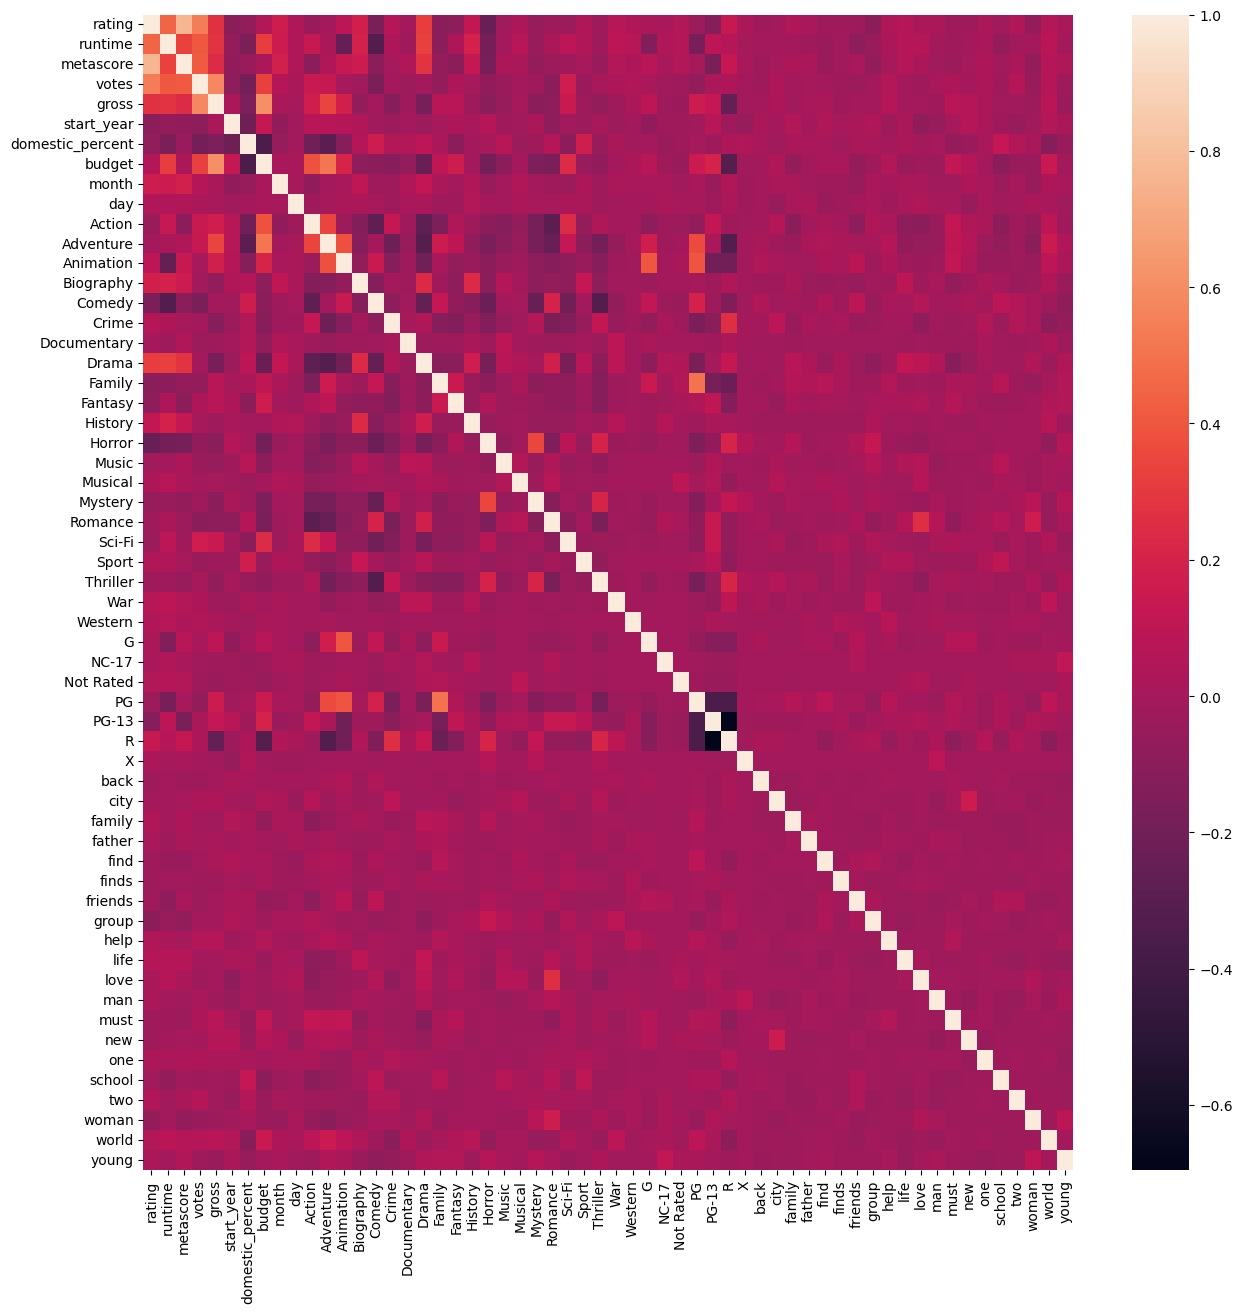

In [23]:
corr = df.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


# plt.savefig('corr.png', dpi=300)
plt.show()

### Train / val / test split (60, 20, 20)

In [24]:
from sklearn.model_selection import train_test_split

target_col = "rating"

X = df.drop([target_col, "metascore"], axis=1)
# X = df
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [25]:
# from sklearn.discriminant_analysis import StandardScaler

# scaler = StandardScaler()
# _ = scaler.fit(X_train)

### Лес решений

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error as maperr

y_pred = model.predict(X_test)

In [28]:
def get_metrics(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = maperr(y_test, y_pred)
    print(f"{rmse=}")
    print(f"{r2=}")
    print(f"{mae=}")
    print(f"{mape=}")

In [29]:
get_metrics(y_pred, y_test)

rmse=0.6103807404440975
r2=0.30197878564825775
mae=0.44947457627118653
mape=0.07350059374484527


In [30]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

In [31]:
model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.05, loss_function='MAE', random_seed=42)

train_pool = Pool(X_train, y_train)

In [32]:
model.fit(train_pool, eval_set=(X_test, y_test), verbose=25, use_best_model=True)

0:	learn: 0.7318457	test: 0.7147553	best: 0.7147553 (0)	total: 53.9ms	remaining: 26.9s
25:	learn: 0.5178088	test: 0.5203356	best: 0.5203356 (25)	total: 75.6ms	remaining: 1.38s
50:	learn: 0.4344068	test: 0.4621691	best: 0.4621691 (50)	total: 98.2ms	remaining: 864ms
75:	learn: 0.3924369	test: 0.4438783	best: 0.4438783 (75)	total: 120ms	remaining: 667ms
100:	learn: 0.3680368	test: 0.4364054	best: 0.4364054 (100)	total: 141ms	remaining: 559ms
125:	learn: 0.3484824	test: 0.4315040	best: 0.4315040 (125)	total: 164ms	remaining: 487ms
150:	learn: 0.3299801	test: 0.4269614	best: 0.4269614 (150)	total: 187ms	remaining: 431ms
175:	learn: 0.3156723	test: 0.4257275	best: 0.4254604 (165)	total: 208ms	remaining: 382ms
200:	learn: 0.3028169	test: 0.4230451	best: 0.4230376 (197)	total: 230ms	remaining: 342ms
225:	learn: 0.2914290	test: 0.4215060	best: 0.4215060 (225)	total: 252ms	remaining: 306ms
250:	learn: 0.2816570	test: 0.4217041	best: 0.4208281 (247)	total: 274ms	remaining: 272ms
275:	learn: 0.272

In [33]:
get_metrics(y_test, model.predict(X_test))

rmse=0.5883414028543512
r2=0.6091281233705795
mae=0.4184228452071092
mape=0.07416036492289856


In [34]:
feature_importance = model.get_feature_importance(type='FeatureImportance')

feature_names = X.columns

feature_importance_dict = {feature_names[i]: feature_importance[i] for i in range(len(feature_names))}

sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

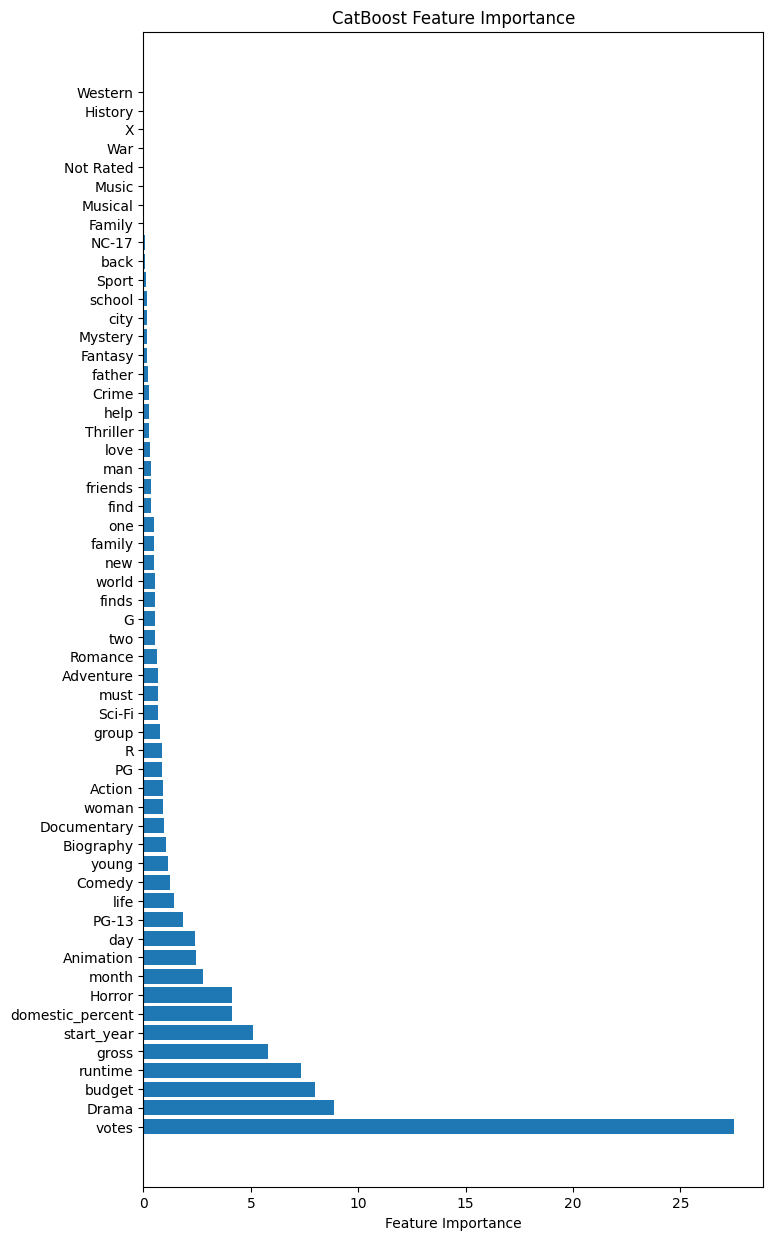

In [35]:
plt.figure(figsize=(8, 15))
plt.barh(range(len(sorted_feature_importance)), list(sorted_feature_importance.values()), align='center')
plt.yticks(range(len(sorted_feature_importance)), list(sorted_feature_importance.keys()))
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()

In [36]:
def get_preds(model, X_train, X_valid, X_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)
    test_pred = model.predict(X_test)
    
    return train_pred, valid_pred, test_pred

In [37]:
from sklearn.discriminant_analysis import StandardScaler


def get_scaled_preds(model, X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    model.fit(X_train_scaled, y_train)
            
    train_pred = model.predict(X_train_scaled)
    valid_pred = model.predict(scaler.transform(X_valid))
    test_pred = model.predict(scaler.transform(X_test))
    
    return train_pred, valid_pred, test_pred

In [38]:
from math import inf


def evaluate_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test, hyperparameter_values, hyperparameter_name, scale):
    train_scores = []
    valid_scores = []
    test_scores = []
    
    param = None
    loss = inf

    for value in hyperparameter_values:
        if hyperparameter_name == 'n_neighbors':
            model.set_params(n_neighbors=int(value))
        elif hyperparameter_name == 'alpha':
            model.set_params(alpha=value)
        elif hyperparameter_name == 'C':
            model.set_params(C=value)
        elif hyperparameter_name == 'max_depth':
            model.set_params(max_depth=int(value))
        elif hyperparameter_name == 'n_estimators':
            model.set_params(n_estimators=int(value))
            
        if scale:
            scaled = get_scaled_preds(model, X_train, X_valid, X_test)
            unscaled = get_preds(model, X_train, X_valid, X_test)
            
            train_scores.extend([maperr(y_train, scaled[0]), maperr(y_train, unscaled[0])])
            valid_scores.extend([maperr(y_valid, scaled[1]), maperr(y_valid, unscaled[1])])
            test_scores.extend([maperr(y_test, scaled[2]), maperr(y_test, unscaled[2])])
        else:
            unscaled = get_preds(model, X_train, X_valid, X_test)
            
            train_scores.append(maperr(y_train, unscaled[0]))
            valid_scores.append(maperr(y_valid, unscaled[1]))
            test_scores.append(maperr(y_test, unscaled[2]))
            
        if (new_loss := maperr(y_valid, unscaled[1])) < loss:
            param = value
            loss = new_loss

    return train_scores, valid_scores, test_scores, param

In [39]:
import numpy as np


hyperparameters = {
    'K-Nearest Neighbor': {'name': 'n_neighbors', 'values': np.arange(1, 21)},
    'Ridge Regression': {'name': 'alpha', 'values': np.logspace(-1.5, 0.5, 10)},
    'Lasso Regression': {'name': 'alpha', 'values': np.logspace(-1.5, 0.5, 10)},
    'SVR': {'name': 'C', 'values': np.logspace(-1.5, 0.5, 10)},
    'Decision Tree': {'name': 'max_depth', 'values': np.arange(1, 21)},
    'Random Forest': {'name': 'n_estimators', 'values': np.arange(1, 101, 10)}
}

best_param = {}

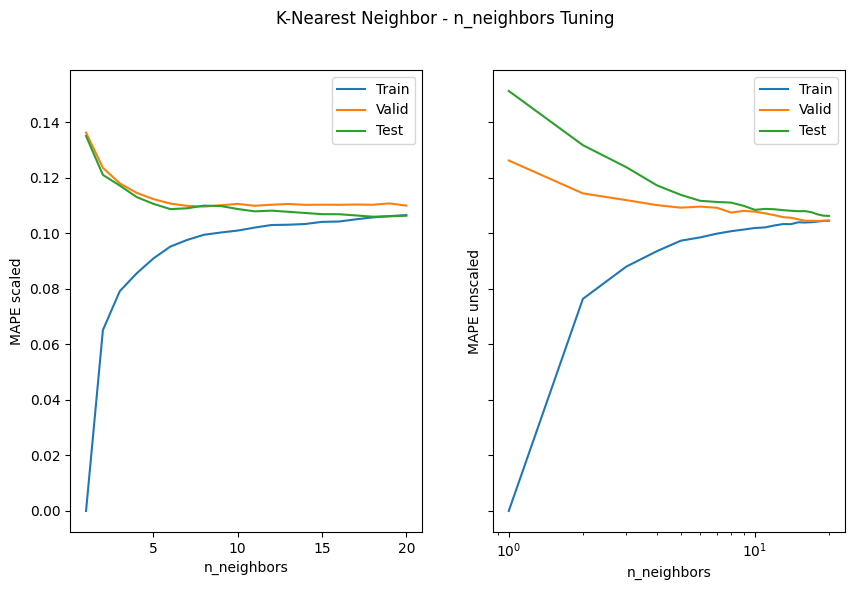

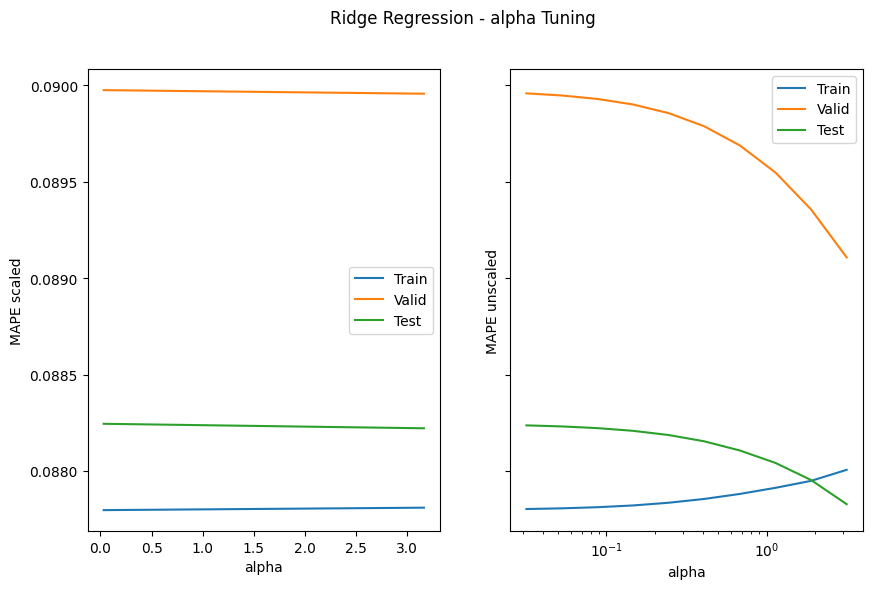

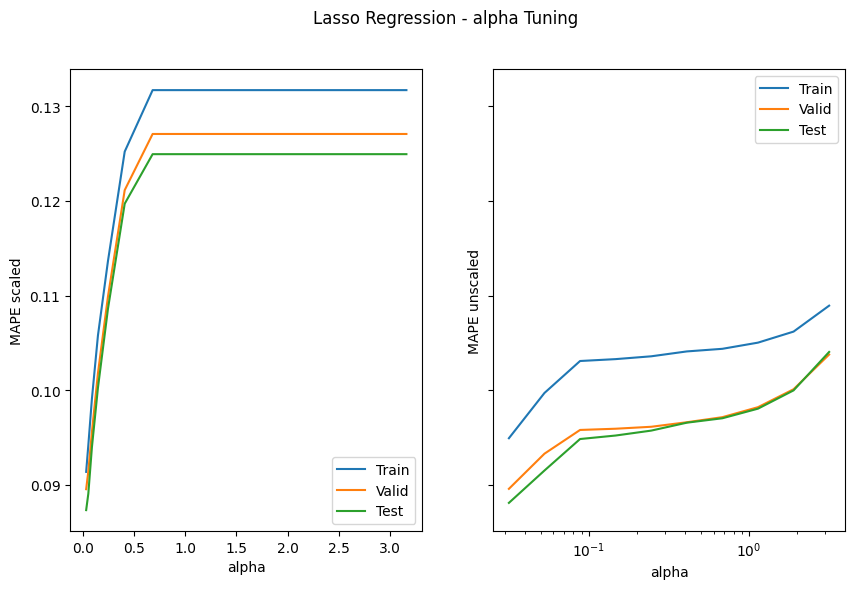

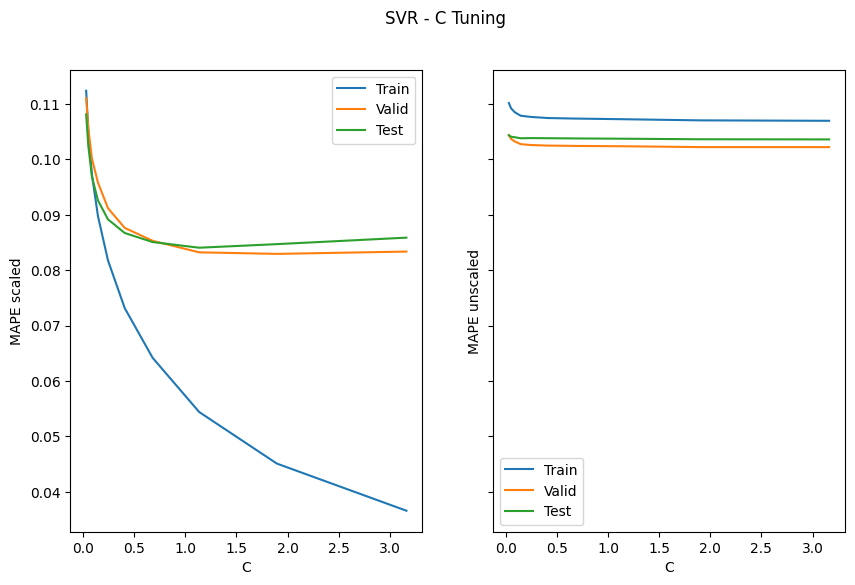

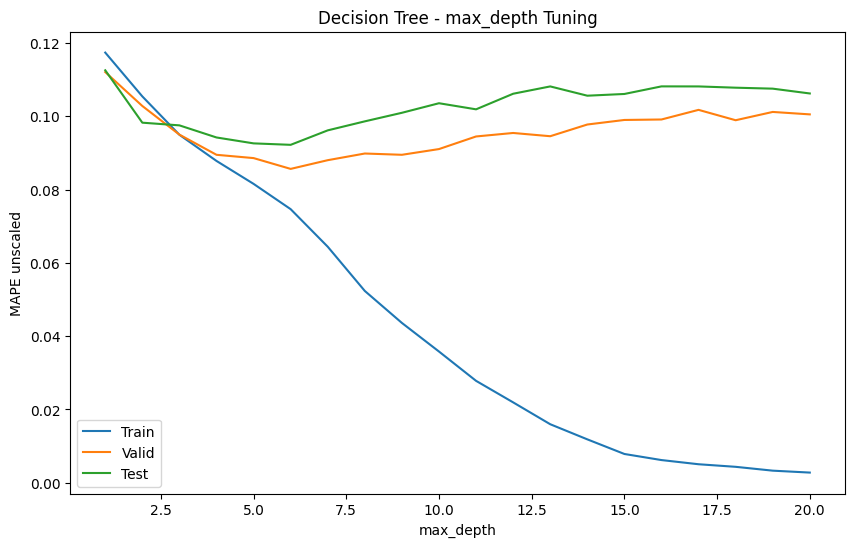

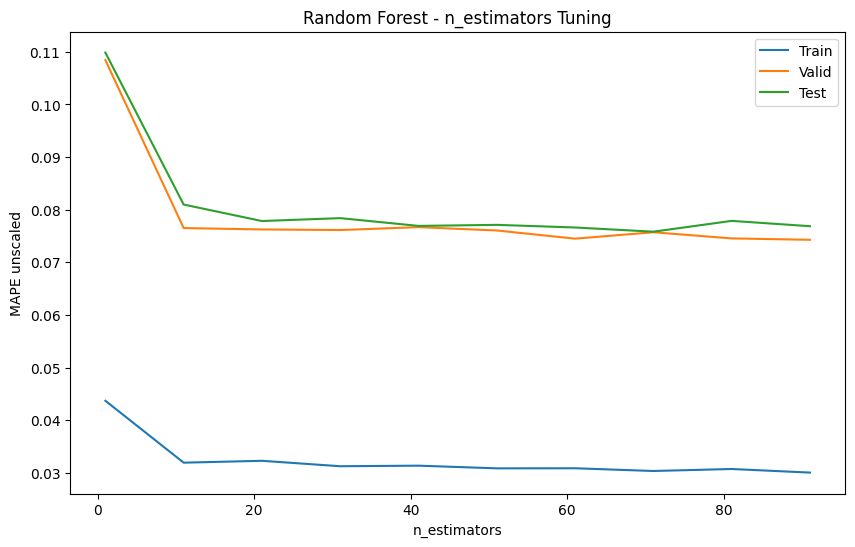

In [40]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

log_scale_models = ['Ridge Regression', 'Lasso Regression', 'SVR']
standard_scale_models = ['K-Nearest Neighbor', 'Ridge Regression', 'Lasso Regression', 'SVR']

for model_name, hyperparameter_info in hyperparameters.items():
    model = None
    if model_name == 'K-Nearest Neighbor':
        model = KNeighborsRegressor()
    elif model_name == 'Ridge Regression':
        model = Ridge()
    elif model_name == 'Lasso Regression':
        model = Lasso()
    elif model_name == 'SVR':
        model = SVR()
    elif model_name == 'Bayes':
        model = BayesianRidge()
    elif model_name == 'Decision Tree':
        model = DecisionTreeRegressor()
    elif model_name == 'Random Forest':
        model = RandomForestRegressor()

    hyperparameter_name = hyperparameter_info['name']
    hyperparameter_values = hyperparameter_info['values']
    
    if model_name in standard_scale_models:
        train_scores, valid_scores, test_scores, param = evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, hyperparameter_values, hyperparameter_name, True)
    else:
        train_scores, valid_scores, test_scores, param = evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, hyperparameter_values, hyperparameter_name, False)
        
    best_param[model_name] = param
    
    if model_name in log_scale_models:
        plt.xscale('log', base=10) 
        
    if model_name in standard_scale_models:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey='row', figsize=(10,6))
        fig.suptitle(f'{model_name} - {hyperparameter_name} Tuning')
        ax1.plot(hyperparameter_values, train_scores[::2], label='Train')
        ax1.plot(hyperparameter_values, valid_scores[::2], label='Valid')
        ax1.plot(hyperparameter_values, test_scores[::2], label='Test')
        ax1.set_xlabel(hyperparameter_name)
        ax1.set_ylabel('MAPE scaled')
        ax1.legend()
        
        ax2.plot(hyperparameter_values, train_scores[1::2], label='Train')
        ax2.plot(hyperparameter_values, valid_scores[1::2], label='Valid')
        ax2.plot(hyperparameter_values, test_scores[1::2], label='Test')
        ax2.set_xlabel(hyperparameter_name)
        ax2.set_ylabel('MAPE unscaled')
        ax2.legend()
    else:
        plt.figure(figsize=(10, 6))
        plt.plot(hyperparameter_values, train_scores, label='Train')
        plt.plot(hyperparameter_values, valid_scores, label='Valid')
        plt.plot(hyperparameter_values, test_scores, label='Test')
        plt.xlabel(hyperparameter_name)
        plt.ylabel('MAPE unscaled')
        plt.legend()
        plt.title(f'{model_name} - {hyperparameter_name} Tuning')
    
plt.show()

In [41]:
best_param

{'K-Nearest Neighbor': 18,
 'Ridge Regression': 3.1622776601683795,
 'Lasso Regression': 0.03162277660168379,
 'SVR': 3.1622776601683795,
 'Decision Tree': 6,
 'Random Forest': 91}

In [42]:
best_models = {
    'knn' : KNeighborsRegressor(n_neighbors=18),
    'ridge' : Ridge(alpha=3.1622776601683795),
    'lasso' : Lasso(alpha=0.03162277660168379),
    'svr' : SVR(C=3.1622776601683795),
    'tree' : DecisionTreeRegressor(max_depth=6),
    'forest' : RandomForestRegressor(n_estimators=71),
    'boost' : CatBoostRegressor(verbose=False)
}

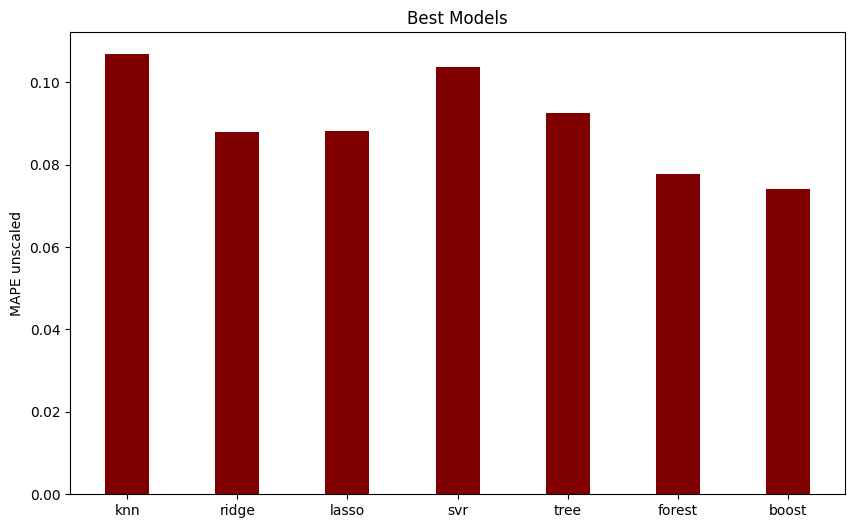

In [43]:
results = []

plt.figure(figsize=(10, 6))

for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    results.append(maperr(y_test, model.predict(X_test)))
    
plt.ylabel('MAPE unscaled')
plt.title(f'Best Models')
plt.bar(best_models.keys(), results, color='maroon', width = 0.4)
plt.show()

```aria2c -x 8 --all-proxy="..." --header="Accept-Language: en-US,en;q=0.5" -i file```